#Erwan LeCun
#Homework 10
#12/14/2015

In [1]:
%pylab inline
import pylab as pl
import pandas as pd
import numpy as np
from sklearn import preprocessing
import geopandas as gp
import os
import scipy.stats
from sklearn.cluster import KMeans
pl.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


# Data Wrangling

In [2]:
geo_df = gp.read_file(os.path.expandvars('$PUI2015/nyc-zip-code-tabulation-areas-polygons.geojson'))

In [3]:
geo_df['zip'] = geo_df['postalCode']

In [4]:
df_1994 = pd.read_csv(os.path.expandvars('$PUI2015/zbp94totals.txt'))
df_1995 = pd.read_csv(os.path.expandvars('$PUI2015/zbp95totals.txt'))
df_1996 = pd.read_csv(os.path.expandvars('$PUI2015/zbp96totals.txt'))
df_1997 = pd.read_csv(os.path.expandvars('$PUI2015/zbp97totals.txt'))
df_1998 = pd.read_csv(os.path.expandvars('$PUI2015/zbp98totals.txt'))
df_1999 = pd.read_csv(os.path.expandvars('$PUI2015/zbp99totals.txt'))
df_2000 = pd.read_csv(os.path.expandvars('$PUI2015/zbp00totals.txt'))
df_2001 = pd.read_csv(os.path.expandvars('$PUI2015/zbp01totals.txt'))
df_2002 = pd.read_csv(os.path.expandvars('$PUI2015/zbp02totals.txt'))
df_2003 = pd.read_csv(os.path.expandvars('$PUI2015/zbp03totals.txt'))
df_2004 = pd.read_csv(os.path.expandvars('$PUI2015/zbp04totals.txt'))
df_2005 = pd.read_csv(os.path.expandvars('$PUI2015/zbp05totals.txt'))
df_2006 = pd.read_csv(os.path.expandvars('$PUI2015/zbp06totals.txt'))
df_2007 = pd.read_csv(os.path.expandvars('$PUI2015/zbp07totals.txt'))
df_2008 = pd.read_csv(os.path.expandvars('$PUI2015/zbp08totals.txt'))
df_2009 = pd.read_csv(os.path.expandvars('$PUI2015/zbp09totals.txt'))
df_2010 = pd.read_csv(os.path.expandvars('$PUI2015/zbp10totals.txt'))
df_2011 = pd.read_csv(os.path.expandvars('$PUI2015/zbp11totals.txt'))
df_2012 = pd.read_csv(os.path.expandvars('$PUI2015/zbp12totals.txt'))
df_2013 = pd.read_csv(os.path.expandvars('$PUI2015/zbp13totals.txt'))

In [5]:
df_1998['zip'] = df_1998['ZIP']
df_1999['zip'] = df_1999['ZIP']
df_2000['zip'] = df_2000['ZIP']
df_2001['zip'] = df_2001['ZIP']
df_2002['zip'] = df_2002['ZIP']

df_1998['est'] = df_1998['EST']
df_1999['est'] = df_1999['EST']
df_2000['est'] = df_2000['EST']
df_2001['est'] = df_2001['EST']
df_2002['est'] = df_2002['EST']

In [6]:
df_1994 = df_1994[['zip', 'est']]
df_1995 = df_1995[['zip', 'est']]
df_1996 = df_1996[['zip', 'est']]
df_1997 = df_1997[['zip', 'est']]
df_1998 = df_1998[['zip', 'est']]
df_1999 = df_1999[['zip', 'est']]
df_2000 = df_2000[['zip', 'est']]
df_2001 = df_2001[['zip', 'est']]
df_2002 = df_2002[['zip', 'est']]
df_2003 = df_2003[['zip', 'est']]
df_2004 = df_2004[['zip', 'est']]
df_2005 = df_2005[['zip', 'est']]
df_2006 = df_2006[['zip', 'est']]
df_2007 = df_2007[['zip', 'est']]
df_2008 = df_2008[['zip', 'est']]
df_2009 = df_2009[['zip', 'est']]
df_2010 = df_2010[['zip', 'est']]
df_2011 = df_2011[['zip', 'est']]
df_2012 = df_2012[['zip', 'est']]
df_2013 = df_2013[['zip', 'est']]

In [7]:
df_1994.columns = ['zip', '1994']
df_1995.columns = ['zip', '1995']
df_1996.columns = ['zip', '1996']
df_1997.columns = ['zip', '1997']
df_1998.columns = ['zip', '1998']
df_1999.columns = ['zip', '1999']
df_2000.columns = ['zip', '2000']
df_2001.columns = ['zip', '2001']
df_2002.columns = ['zip', '2002']
df_2003.columns = ['zip', '2003']
df_2004.columns = ['zip', '2004']
df_2005.columns = ['zip', '2005']
df_2006.columns = ['zip', '2006']
df_2007.columns = ['zip', '2007']
df_2008.columns = ['zip', '2008']
df_2009.columns = ['zip', '2009']
df_2010.columns = ['zip', '2010']
df_2011.columns = ['zip', '2011']
df_2012.columns = ['zip', '2012']
df_2013.columns = ['zip', '2013']

In [8]:
merge_result = df_1994.merge(df_1995,on='zip').merge(df_1996,on='zip').merge(df_1997,on='zip').merge(df_1998,on='zip').merge(df_1999,on='zip').merge(df_2000,on='zip').merge(df_2001,on='zip').merge(df_2002,on='zip').merge(df_2003,on='zip').merge(df_2004,on='zip').merge(df_2005,on='zip').merge(df_2006,on='zip').merge(df_2007,on='zip').merge(df_2008,on='zip').merge(df_2009,on='zip').merge(df_2010,on='zip').merge(df_2011,on='zip').merge(df_2012,on='zip').merge(df_2013,on='zip')

In [9]:
merge_est = merge_result[['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', 
                          '2002', '2003', '2004', '2005', '2006', '2007', 
                          '2008', '2009', '2010', '2011', '2012', '2013']]

In [10]:
merge_result['zip'] = merge_result['zip'].astype(float)

In [11]:
geo_df['zip'] = geo_df['zip'].astype(float)

In [12]:
geo_merge = geo_df.merge(merge_result, on = 'zip', how = 'inner')

In [13]:
merge_est = geo_merge[['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', 
                          '2002', '2003', '2004', '2005', '2006', '2007', 
                          '2008', '2009', '2010', '2011', '2012', '2013']]

In [14]:
merge_zip = geo_merge[['zip']]

In [15]:
for k in merge_est.index:
    temp_1994 = (merge_est['1994'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_1995 = (merge_est['1995'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_1996 = (merge_est['1996'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_1997 = (merge_est['1997'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_1998 = (merge_est['1998'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_1999 = (merge_est['1999'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2000 = (merge_est['2000'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2001 = (merge_est['2001'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2002 = (merge_est['2002'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2003 = (merge_est['2003'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2004 = (merge_est['2004'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2005 = (merge_est['2005'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2006 = (merge_est['2006'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2007 = (merge_est['2007'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2008 = (merge_est['2008'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2009 = (merge_est['2009'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2010 = (merge_est['2010'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2011 = (merge_est['2011'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2012 = (merge_est['2012'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    temp_2013 = (merge_est['2012'].iloc[[k]] - merge_est.iloc[[k]].mean(1)) / merge_est.iloc[[k]].std(1)
    
    merge_est['1994'].iloc[[k]] = temp_1994
    merge_est['1995'].iloc[[k]] = temp_1995
    merge_est['1996'].iloc[[k]] = temp_1996
    merge_est['1997'].iloc[[k]] = temp_1997
    merge_est['1998'].iloc[[k]] = temp_1998
    merge_est['1999'].iloc[[k]] = temp_1999
    merge_est['2000'].iloc[[k]] = temp_2000
    merge_est['2001'].iloc[[k]] = temp_2001
    merge_est['2002'].iloc[[k]] = temp_2002
    merge_est['2003'].iloc[[k]] = temp_2003
    merge_est['2004'].iloc[[k]] = temp_2004
    merge_est['2005'].iloc[[k]] = temp_2005
    merge_est['2006'].iloc[[k]] = temp_2006
    merge_est['2007'].iloc[[k]] = temp_2007
    merge_est['2008'].iloc[[k]] = temp_2008
    merge_est['2009'].iloc[[k]] = temp_2009
    merge_est['2010'].iloc[[k]] = temp_2010
    merge_est['2011'].iloc[[k]] = temp_2011
    merge_est['2012'].iloc[[k]] = temp_2012
    merge_est['2013'].iloc[[k]] = temp_2013
    

/Users/erwan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/erwan/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/erwan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/erwan/anaconda/lib/python2.7/site-packages/IPython/ke

# K-means Clustering

In [16]:
est_array = merge_est.values

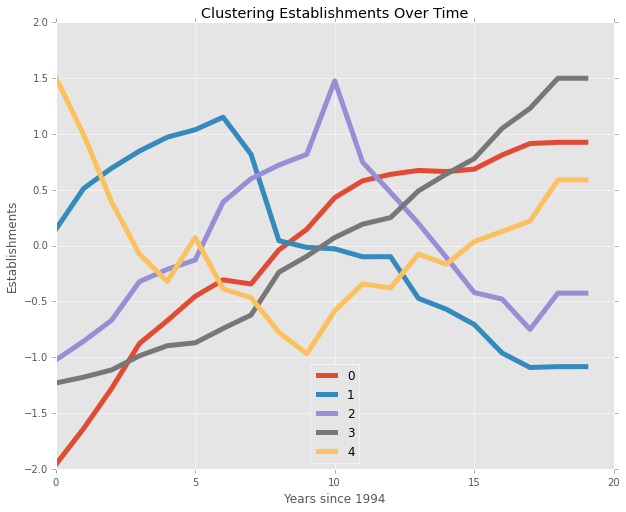

In [17]:
# perform clustering and plotting
fig = pl.figure(figsize=(10, 8))
pl.title('Clustering Establishments Over Time')

kmeans = KMeans(n_clusters=5)
kmeans.fit(est_array)
for i in range(5):
    pl.plot(kmeans.cluster_centers_[i], label = i, lw = 5)
    
pl.legend(loc='lower center')
pl.xlabel('Years since 1994')
pl.ylabel('Establishments')

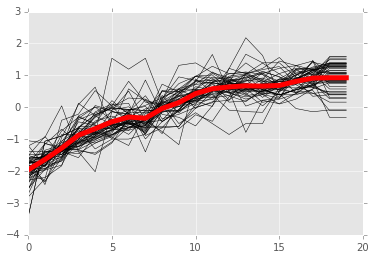

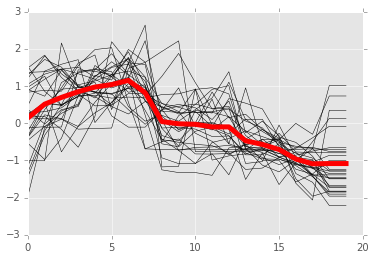

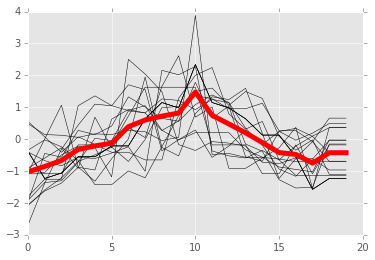

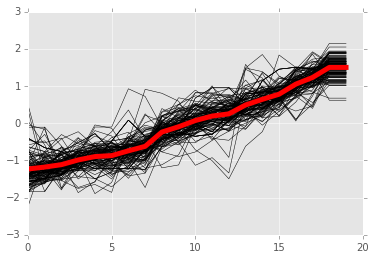

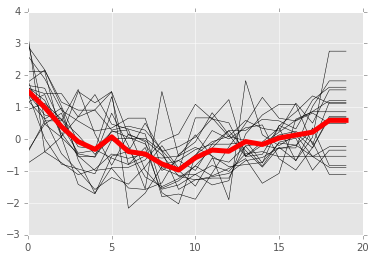

In [18]:
for j in range(kmeans.n_clusters):
    index = kmeans.labels_ == j
    pl.figure()
    for ii in range (0, len(est_array)):
        if index[ii] == True:   
            pl.plot(est_array[ii], color = 'k', lw = 0.5)
    pl.plot(kmeans.cluster_centers_[j], color = 'red', lw = 5)

In [19]:
geo_merge['cluster'] = kmeans.labels_

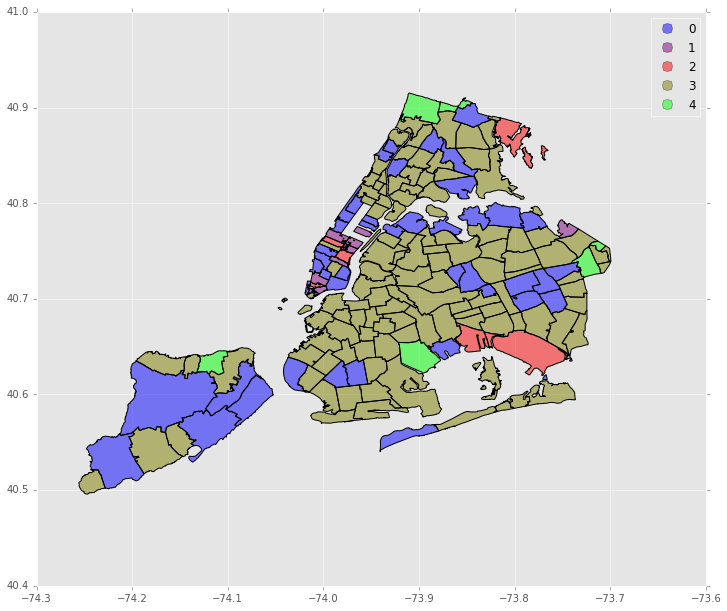

In [20]:
geo_merge.plot(column = 'cluster', figsize=[12,12], categorical=True, legend=True, colormap = 'brg')

# Heirarchical Clustering

In [21]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)

In [22]:
X = est_array

In [23]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [24]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.88189300635820256

In [25]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

/Users/erwan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


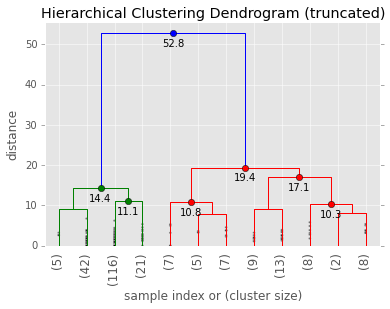

In [26]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [27]:
from scipy.cluster.hierarchy import fcluster
max_d = 12
clusters = fcluster(Z, max_d, criterion='distance')

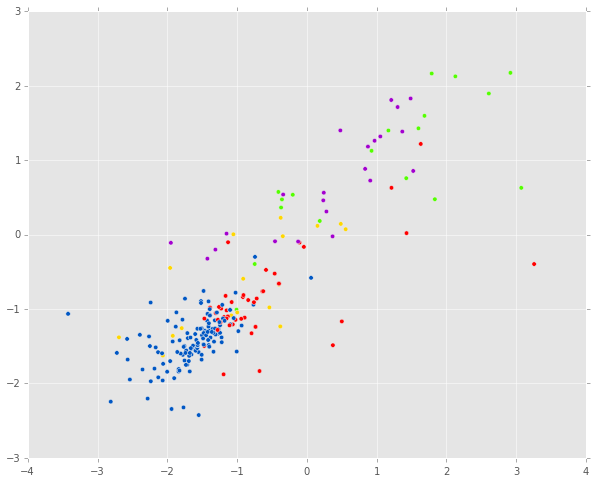

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

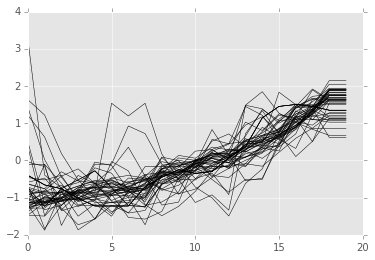

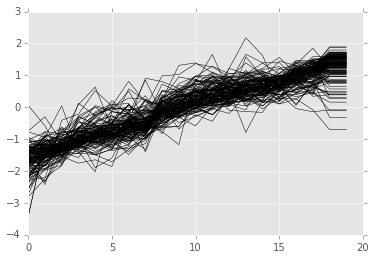

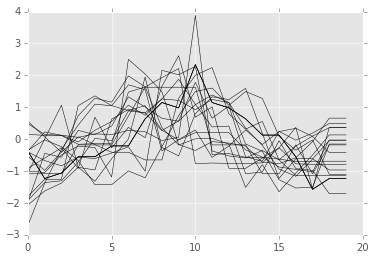

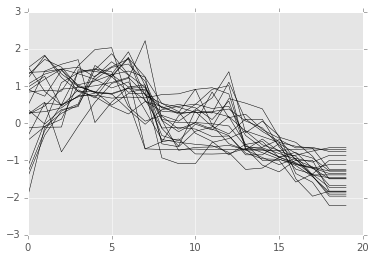

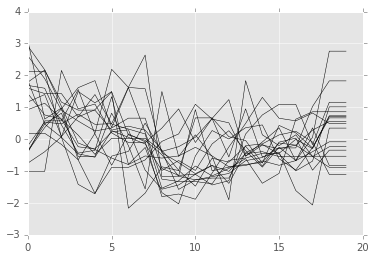

In [29]:
for j in range(6):
    index = clusters == j
    pl.figure()
    for ii in range (0, len(est_array)):
        if index[ii] == True:   
            pl.plot(est_array[ii], color = 'k', lw = 0.5)

In [30]:
geo_merge['cluster'] = clusters

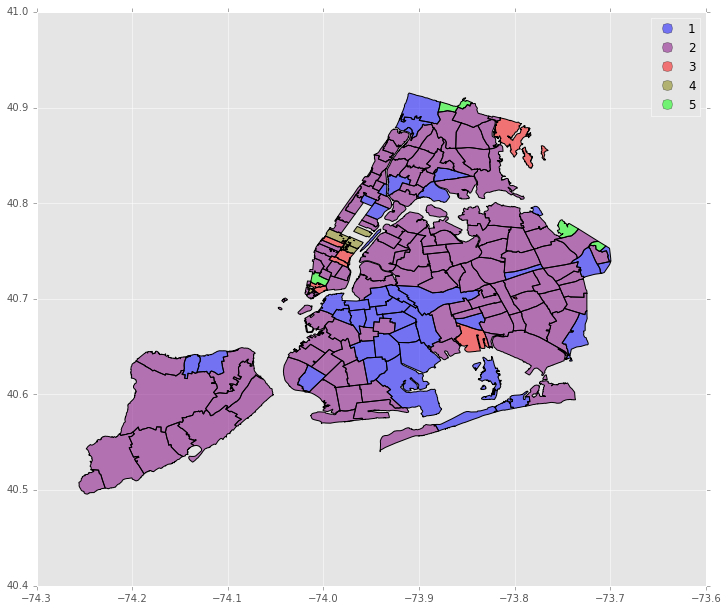

In [31]:
geo_merge.plot(column = 'cluster', figsize=[12,12], categorical=True, legend=True, colormap = 'brg')

#Compare Results

###Both graphs show similar trends across NYC with 5 clusters. Most of NYC is shown as growing, while some parts of midtown and the financial district are stagnating. 

#Interpretation

###With 5 clusters, these graphs seem to show that NYC is growing in its number of establishments. The only places that are stagnating are midtown and the financial district, most likely because those areas are completely saturated with establishments already. Some neighborhoods on the outer edges of the city are shrinking over time, but they are few and far between.